In [42]:
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import warnings
import random
import sklearn.metrics
warnings.filterwarnings('ignore')

In [3]:
# pickle load
def loadpkl(path):
    infile = open(path, 'rb')
    obj = pickle.load(infile)
    infile.close()
    return obj

In [22]:
# load the network and centrality
#DiG = nx.read_edgelist(path = "Network-Analysis-Project/citation.edgelist", create_using=nx.DiGraph())
DiG = nx.read_edgelist(path = "test.edgelist", create_using=nx.DiGraph())

In [23]:
# Remove 25% of the edges (25%)
edge_subset = random.sample(DiG.edges(), int(0.25 * DiG.number_of_edges()))
DiG_train = DiG.copy()
DiG_train.remove_edges_from(edge_subset)

In [24]:
edge_subset_size = len(list(edge_subset))
print("Deleted : ", str(edge_subset_size))
print("Remaining : ", str((DiG.number_of_edges() - edge_subset_size)))

Deleted :  500
Remaining :  1500


In [25]:
G_train = DiG_train.to_undirected()

In [40]:
# Jaccard Coefficient, for undirected graph
pred_jaccard = list(nx.jaccard_coefficient(G_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])

In [43]:
# Compute the ROC AUC Score
fpr_jaccard, tpr_jaccard, _ = sklearn.metrics.roc_curve(label_jaccard, score_jaccard)
auc_jaccard = sklearn.metrics.roc_auc_score(label_jaccard, score_jaccard)

In [30]:
# Adamic-Adar Index, for undirected graph
pred_adamic = list(nx.adamic_adar_index(G_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_adamic])

In [45]:
# Compute the ROC AUC Score
fpr_adamic, tpr_adamic, _ = sklearn.metrics.roc_curve(label_adamic, score_adamic)
auc_adamic = sklearn.metrics.roc_auc_score(label_adamic, score_adamic)

In [34]:
# preferential attachment score 
pred_pref = list(nx.preferential_attachment(G_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_pref])

In [47]:
# Compute the ROC AUC Score
fpr_pref, tpr_pref, _ = sklearn.metrics.roc_curve(label_pref, score_pref)
auc_pref = sklearn.metrics.roc_auc_score(label_pref, score_pref)

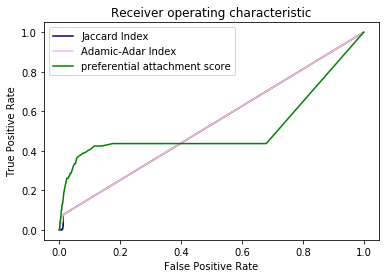

In [50]:
# plot ROC curves
plt.clf()
plt.plot(fpr_jaccard, tpr_jaccard, color='navy',label='ROC curve (area = %0.2f)' % auc_jaccard)
plt.plot(fpr_adamic, tpr_adamic, color='pink',label='ROC curve (area = %0.2f)' % auc_adamic)
plt.plot(fpr_pref, tpr_pref, color = 'green', label='ROC curve (area = %0.2f)' % auc_pref)
plt.legend(('Jaccard Index','Adamic-Adar Index', 'preferential attachment score'),loc=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.savefig("ROC.png", dpi=200)